## Gimodules usage examples

This jupyter notebook is intended to demonstrate the workflow or usage of the gimodules package.
The purpose of this package is to provide a python interface to the GI Cloud API.
These include:
- Login to the cloud
- Get all stream metadata
- Export and Import CSV
- Get measurements
- Get data as dataframe
- UDBF and other formats
- Get specific variables with specific dates


These environments and examples are tested with Python 3.10.


In [1]:
# Enable autoreload for debugging
#%load_ext autoreload
#%autoreload 2

### Authenticating with GI.cloud

This cell shows how to initialize and authenticate a `CloudRequest` session.

There are three supported login methods:
1. **Username & password**
2. **Access token**
3. **Environment file (`.env`)**

In this example, credentials are loaded from a `.env` file using:

Create a .env file and place in the filled keys (`CLOUD_TENANT=''`, `BEARER_TOKEN=''`)

In [3]:
from gimodules.cloudconnect.cloud_request import CloudRequest, DataFormat
gi = CloudRequest()

# You can log in with username and password or with an access token or using a .env file
#gi.login(url='https://demo.gi-cloud.io', user='', password='')
#gi.login(url='https://demo.gi-cloud.io', access_token='')
gi.login(use_env_file=True, dotenv_path=r'C:\Users\heinzlen\Desktop\git_projects\gimodules-python\.env')


INFO:root:05d77968-ffdd-45e1-b7b8-3ccd1d7f1d3b
INFO:root:Streamname:         CSV_ImportTest_3
Streamid:           05bd4d27-af9a-46e5-a3bd-79e4ed408eb3
first ts:           1637020800000 2021-11-16 00:00:00
last ts:            1637096760000 2021-11-16 21:06:00
Samplerate:         10

INFO:root:Streamname:         low_sample_rate_test
Streamid:           232a3458-d464-4ed3-b97a-860648800769
first ts:           1722729600000 2024-08-04 00:00:00
last ts:            1723333800000 2024-08-10 23:50:00
Samplerate:         0.0033333333333333335

INFO:root:Streamname:         OTF4_CMS_Skimmer
Streamid:           2d5cfdc8-0ef4-11ec-b094-02420a0001be
first ts:           1630920600000 2021-09-06 09:30:00
last ts:            1750177740000 2025-06-17 16:29:00
Samplerate:         10

INFO:root:Streamname:         CSV_ImportTest_7
Streamid:           39ac0416-7f4f-435b-be86-10b00991e1de
first ts:           1280192160000 2010-07-27 00:56:00
last ts:            1280195880000 2010-07-27 01:58:00
Samplerate

There are a couple of helper methods to retrive basic information.

The Unique identifier for things like streams and variables are UUIDs.

Take a look at the methods or inspect the module directly.



In [4]:
print(dir(gi))

['Dict', 'Optional', '_CloudRequest__convert_df_time_from_utc_to_tz', '_CloudRequest__get_column_names', '_CloudRequest__import_file_csv', '_CloudRequest__import_session_valid', '_CloudRequest__validate_timezone', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_build_sensorid_querystring', '_create_import_session_udbf', '_delete_import_session', '_execute_gql_request', '_generate_date_intervals', '_get_stream_name_for_sid', '_get_stream_name_for_sid_vid', '_last_import_ts', '_parse_first_timestamp', '_require_csv_session', '_resolve_stream_id', '_upload_csv_binary', 'convert_datetime_to_unix', 'create_import_session_csv', 'csv_config', 'delete_source', 'filter_var_attr', 'find_var', 'get_all_s

In [8]:
gi.get_streams_by_name("demo_otf4")
gi._get_stream_name_for_sid('d00bf736-3af4-459d-9567-39e4bfb17409')


'demo_otf4'

In [10]:
gi.get_all_stream_metadata()

{'OTF4_CMS_Skimmer': GIStream(name='OTF4_CMS_Skimmer', id='2d5cfdc8-0ef4-11ec-b094-02420a0001be', sample_rate_hz=10, first_ts=1630920600000, last_ts=1727078460000, index=0),
 'PV_Inv-A.02.02': GIStream(name='PV_Inv-A.02.02', id='6d300808-d85e-3128-b7bf-0a7b01069860', sample_rate_hz=1, first_ts=1609455900000, last_ts=1672528500000, index=1),
 'OTF4_CMS_Live_New': GIStream(name='OTF4_CMS_Live_New', id='708d5f80-509b-11e9-8bd7-02420a000a33', sample_rate_hz=10, first_ts=1714771740000, last_ts=1732540680000, index=2),
 'PV_Inv-A.01.01': GIStream(name='PV_Inv-A.01.01', id='9e779707-0a04-3f86-9a0b-8b378a580517', sample_rate_hz=1, first_ts=1609455900000, last_ts=1672528500000, index=3),
 'GrafanaNotifications': GIStream(name='GrafanaNotifications', id='a45e379c-11da-11eb-a1ca-02420a000aa7', sample_rate_hz=1, first_ts=1603091700000, last_ts=1732540680000, index=4),
 'OTF4_Irridiance_1Hz_RT3M': GIStream(name='OTF4_Irridiance_1Hz_RT3M', id='b066f5a2-88d1-11ef-83ac-02420a00017f', sample_rate_hz=1,

### Exporting and Re-importing Stream Data

In this section, we demonstrate how to download data from a GI.cloud stream and re-upload it as a CSV file to create a new stream.

#### Step 1: Export Data to CSV

We first retrieve all variables from an existing stream and fetch the data between two timestamps at a 15-minute resolution. This data is then written to a local CSV file (`test.csv`).

```python
variables = gi.get_all_vars_of_stream('<stream_id>')
df = gi.get_data_as_csv(variables, start=..., end=..., resolution=...)
df.to_csv('test.csv', index=False, sep=';')


In [15]:

variables = gi.get_all_vars_of_stream('d00bf736-3af4-459d-9567-39e4bfb17409')

test_csv = gi.get_data_as_csv(variables=variables,
                   start='2022-01-01 00:00:00',
                   end='2022-01-02 00:00:00',
                   resolution=gi.resolutions.QUARTER_HOUR.value
                   )

test_csv.to_csv('test.csv', index=False, sep=';')


#### Step 2: Configure CSV Import Settings

To ensure correct parsing, the structure of the CSV must be described explicitly:

#### Step 3: Upload the CSV File

We upload the CSV to GI.cloud. If the stream_name does not exist yet, a new stream will be created:

In [17]:
print(gi.csv_config)

gi.csv_config.UnitRowIndex = 1
gi.csv_config.ValuesStartRowIndex = 4
gi.csv_config.NameRowIndex = 0
gi.csv_config.DateTimeFmtColumn1 = "%Y-%m-%dT%H:%M:%S"
gi.csv_config.ColumnSeparator = ";"


gi.upload_csv_file(stream_name='test_import', file_path='../test.csv')

INFO:root:First CSV timestamp: 1640995200.0, 01.01.2022 01:00:00
INFO:root:Stream already exists in GI.Cloud. Continuing import for stream ID: f8e55cbc-768c-43fe-a2a7-352b53b34c3a
INFO:root:Last UTC imported timestamp: 1617319800.0, 2021-04-01 23:30:00
INFO:root:CSV file successfully imported.
INFO:root:Import of test.csv was successful


'f8e55cbc-768c-43fe-a2a7-352b53b34c3a'

#### Step 4: Delete a Stream
With this call we delete a stream fully with its aggregated and raw (kafka) data

In [ ]:
gi.delete_source('d00bf736-3af4-459d-9567-39e4bfb17409', use_kafka=True)

### Get Measurments

We can get the last 10 measurements or the last 10 measurements between a start and end timestamp.

In [11]:

import pandas as pd

start_timestamp = pd.Timestamp('2023-01-01 00:00:00')
end_timestamp = pd.Timestamp('2023-02-02 00:00:00')

#gi.get_measurement_limit('d00bf736-3af4-459d-9567-39e4bfb17409', 10) # Last 10 measurements

meas_list = gi.get_measurement_limit('d00bf736-3af4-459d-9567-39e4bfb17409', 10, int(start_timestamp.timestamp() * 1000), int(end_timestamp.timestamp() * 1000)) # Last 10 measurements between start and end timestamp


measurements = gi.print_measurement() # List[List] start and stop measurements
measurements

array([[1.67520960e+12, 1.67529594e+12],
       [1.67253120e+12, 1.67520954e+12]])

In [12]:
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime, timezone

def get_datetime(timestamp):
    return datetime.fromtimestamp(timestamp/1000, tz=timezone.utc).strftime("%Y-%m-%d %H:%M:%S")

def fetch_data(stream_var, start, end, timezone):
    return gi.get_data_as_csv(stream_var, gi.resolutions.KHZ.value, get_datetime(start), get_datetime(end), write_file=False, timezone=timezone)

with ThreadPoolExecutor() as executor:
    futures = [
        executor.submit(fetch_data, variables, measurement[0], measurement[1], 'Europe/Berlin')
        for measurement in measurements
    ]
    meas_results = [future.result() for future in futures]

In [13]:
meas_results[0]

datetime                  time Tsens_1__cSi__15 Tsens_1__Pyr__9  \
0       NaN                   NaN        demo_otf4       demo_otf4   
1       NaN                   NaN              avg             avg   
2       NaN  [s since 01.01.1970]              NaN             NaN   

  Tsens_1__cSi__5 Sunheight_MID11_OTF4 mIsc_MID11_OTF4 Bn_1__Pyrh__10  \
0       demo_otf4            demo_otf4       demo_otf4      demo_otf4   
1             avg                  avg             avg            avg   
2             NaN                  NaN             NaN            NaN   

  Sunazimut_MID11_OTF4 mVoc_MID11_OTF4  ... Gi_1__Pyr__3 Gi_1__cSi__14  \
0            demo_otf4       demo_otf4  ...    demo_otf4     demo_otf4   
1                  avg             avg  ...          avg           avg   
2                  NaN             NaN  ...          NaN           NaN   

  WS_1__WindSensor__1 Airmass_MID11_OTF4 Tmod_21__Tmod__121 Gi_1__cSi__5  \
0           demo_otf4          demo_otf4          demo_otf4    demo_otf4   
1                 avg                avg                avg          avg   
2                 NaN                NaN                NaN          NaN   

  Tsens_1__Pyr__13 Gh_1__Pyr__8 Gi_1__Pyr__13 Tmod_12__Tmod__112  
0        demo_otf4    demo_otf4     demo_otf4          demo_otf4  
1              avg          avg           avg                avg  
2              NaN          NaN           NaN                NaN  

[3 rows x 29 columns]

### Get Data as dataframe

We can also get the data through the GraphQL API. Because of backend limitations, this only makes sense for a smaller amount of data.

In [16]:
indices = [var.index for var in variables]
indices

['a2',
 'a25',
 'a0',
 'a7',
 'a26',
 'a8',
 'a6',
 'a23',
 'a10',
 'a14',
 'a21',
 'a5',
 'a13',
 'a1',
 'a20',
 'a11',
 'a19',
 'a18',
 'a9',
 'a4',
 'a22',
 'a3',
 'a12',
 'a17',
 'a15',
 'a16',
 'a24']

In [17]:
gi.get_var_data('d00bf736-3af4-459d-9567-39e4bfb17409', indices, '2023-01-01 00:00:00', '2023-02-02 00:00:00', gi.resolutions.QUARTER_HOUR.value)

Time  WS_1__WindSensor__1  WD_1__WindSensor__2  \
0    2023-01-01 04:00:00+00:00             1.121185            89.390130   
1    2023-01-01 04:15:00+00:00             1.518394            90.468864   
2    2023-01-01 04:30:00+00:00             1.078871           140.312059   
3    2023-01-01 04:45:00+00:00             1.673249           270.718648   
4    2023-01-01 05:00:00+00:00             0.905429            79.495067   
...                        ...                  ...                  ...   
1999 2023-01-27 10:00:00+00:00             2.273127            84.753237   
2000 2023-01-27 10:15:00+00:00             2.224676            82.165088   
2001 2023-01-27 10:30:00+00:00             1.877820            94.920769   
2002 2023-01-27 10:45:00+00:00             1.813150            75.302236   
2003 2023-01-27 11:00:00+00:00             1.789637            63.989722   

      Gi_1__Pyr__3  Gh_1__Pyr__8  Tsens_1__Pyr__8  Gi_1__Pyr__13  \
0        -1.804234      0.369004        13.226110       1.186145   
1        -1.647918      0.569814        13.569333       1.267114   
2        -1.796626      0.755337        14.102193       1.386534   
3        -1.623196      0.177386        13.758856       1.315157   
4        -1.766212      0.371064        13.418584       1.329071   
...            ...           ...              ...            ...   
1999    780.295520    484.498938        12.538763    1034.595972   
2000    830.457629    523.789040        13.052826    1051.336263   
2001    876.145593    558.373018        13.681702    1065.010319   
2002    916.575789    590.635856        14.269211    1076.088249   
2003    953.497624    620.024455        14.607127    1087.503182   

      Tsens_1__Pyr__13  Dh_1__Pyr__9  Tsens_1__Pyr__9  ...  Tamb_1__Tamb__7  \
0            12.507752     -0.157150        13.152232  ...        12.654016   
1            12.830296     -0.386999        13.509838  ...        13.293081   
2            13.355637     -0.136513        14.047506  ...        13.745432   
3            12.997780      0.109504        13.675791  ...        12.746695   
4            12.700514     -0.189564        13.353678  ...        12.747585   
...                ...           ...              ...  ...              ...   
1999         12.536876     56.593918        11.926697  ...        11.095793   
2000         13.007181     56.091531        12.374949  ...        11.743472   
2001         13.625376     58.033804        12.984215  ...        12.550695   
2002         14.135661     61.863350        13.550924  ...        12.723092   
2003         14.314748     61.809841        13.833522  ...        12.557635   

      Tmod_12__Tmod__112  Tmod_21__Tmod__121  Tmod_25__Tmod__125  \
0              10.605412           10.378220           10.785004   
1              11.183950           11.052320           11.345663   
2              11.766402           11.589549           11.878276   
3              11.195948           11.013941           11.628109   
4              10.880178           10.707241           11.262278   
...                  ...                 ...                 ...   
1999           28.493349           28.243335           38.826237   
2000           29.993504           29.850730           39.125776   
2001           32.061229           32.827435           41.878706   
2002           35.022445           35.430612           42.303253   
2003           36.474318           35.728231           40.140394   

      Airmass_MID11_OTF4  Sunheight_MID11_OTF4  Sunazimut_MID11_OTF4  \
0              -1.515600            -41.307252             93.055155   
1              -1.618338            -38.187639             94.939637   
2              -1.741186            -35.076908             96.768187   
3              -1.889640            -31.978017             98.557564   
4              -2.071464            -28.893815            100.321881   
...                  ...                   ...                   ...   
1999            2.326883  

#### Call the function without a resolution to get the raw data

In [ ]:
gi.get_var_data('d00bf736-3af4-459d-9567-39e4bfb17409', indices, '2023-01-01 00:00:00', '2023-01-02 00:00:00')

### Exporting Data in other Formats (UDBF)

This example demonstrates how to fetch binary buffer data from a GI.cloud stream and save it in **UDBF** format—a binary format that can be easily opened and analyzed in GI.bench.

#### Data Format Options

GI.cloud supports exporting buffer data in multiple formats. You can inspect the supported formats with:


**Note: Only `get_data_as_csv` has no backend limits for exporting data**

In [12]:
print([e.value for e in DataFormat])

['col', 'row', 'json', 'csv', 'udbf', 'famos', 'mdf', 'mat', 'wav', 'rpc']


In [34]:
from gimodules.cloudconnect.cloud_request import DataFormat

bytes = gi.get_buffer_data(
    start = -6000000,
    end = 0,
    variables = [
        {
      "SID": "d00bf736-3af4-459d-9567-39e4bfb17409", # Stream ID
      "VID": "a759c0fb-5f73-4aa6-8748-61247f40d8fc", # Variable ID
      "Selector": "auto"
        }
],
    data_format=DataFormat.UDBF
)

with open('file.dat', 'wb') as f:
    f.write(bytes)



INFO:root:'log_settings' can be configured when data_format is DataFormat.UDBF.


In [39]:
import uuid
uuid4 = uuid.uuid4()

#gi.create_import_session_udbf(str(uuid4), 'test_udbf')
gi.import_file_udbf(str(uuid4),
                    'test_ubdf2',
                    bytes)

INFO:root:Import session created for UDBF file: {'Success': True, 'Message': 'Loaded data', 'Total': 1, 'Data': {'MeasID': '370636c0-537c-408d-b21d-4beab5dbc777', 'SessionID': '3d51104e-9295-4d66-99bc-13cae88ca7b6', 'SourceID': 'd74fef46-9b23-406a-baac-6706e8d11707', 'SourceName': 'test_ubdf2'}}
INFO:root:UDBF file successfully imported.


<Response [200]>

### Get specific variables with specific dates

We take the ID of a stream and select all variables. Then we filter the variables by a specific subname.

Now, we fetch data for individual days concurrently.

Keep in mind that for each result DF, we drop the first three columns that contain metadata.
Finally, we concatenate and sort by the date column.

In [ ]:
from gimodules.cloudconnect.cloud_request import GIStreamVariable
from concurrent.futures import ThreadPoolExecutor
from typing import List
import pandas as pd

# Only get pattern matching variables
variables = gi.get_all_vars_of_stream('d00bf736-3af4-459d-9567-39e4bfb17409')
def filter_variables_by_subname(variables: List[GIStreamVariable], subname: str) -> List[GIStreamVariable]:
    return [var for var in variables if subname in var.name]

variables = filter_variables_by_subname(variables, 'Gi_')


# Fetch data for individual days concurrently

def fetch_data_for_day(variables: List[str], date: str) -> pd.DataFrame:
    start = f'{date} 00:00:00'
    end = f'{date} 23:59:59'
    df = gi.get_data_as_csv(
        variables=variables,
        start=start,
        end=end,
        resolution=gi.resolutions.MINUTE.value,
        write_file=False
    )
    return df.assign(date=date)  # Add date column for sorting later

def fetch_data_for_multiple_days(variables: List[str], dates: List[str]) -> pd.DataFrame:
    with ThreadPoolExecutor() as executor:
        dfs = list(executor.map(lambda date: fetch_data_for_day(variables, date), dates))

    # Drop first three columns for all but the first DataFrame
    dfs[:] = [df.iloc[3:] for df in dfs[:]]

    # Concatenate and sort by the date column
    final_df = pd.concat(dfs, ignore_index=False).sort_values(by="time").drop(columns=["date"])
    return final_df

import random
dates = pd.date_range(start="2022-01-01", end="2023-12-31")
random_dates = (random.sample(list(dates), 50))

random_dates_list = [date.strftime('%Y-%m-%d') for date in random_dates]
dates = ['2022-01-01', '2023-01-01', '2022-11-01']  # Add more specific days as needed
final_df = fetch_data_for_multiple_days(variables, random_dates_list)
display(final_df)
final_df.to_csv('final_df.csv', index=False)

### Visualization

The package contains some examples for visualization you could create with the data in python.



In [3]:
import pandas as pd

test_csv = test_csv[3:] # Cut metadata
import pandas as pd

def convert_object_columns_to_float(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.select_dtypes(include='object').columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError:
            pass
    return df

test_csv = convert_object_columns_to_float(test_csv)


In [39]:
test_csv

datetime          time  Tsens_1__cSi__15  Tsens_1__Pyr__9  \
6   ﻿2022-01-01T00:45:00  1.640998e+09         12.493726        13.925525   
7   ﻿2022-01-01T01:00:00  1.640999e+09         12.548839        14.040883   
8   ﻿2022-01-01T01:15:00  1.641000e+09         12.703898        14.060822   
9   ﻿2022-01-01T01:30:00  1.641001e+09         11.390633        12.947290   
10  ﻿2022-01-01T01:45:00  1.641002e+09         10.814163        12.065018   
..                   ...           ...               ...              ...   
94  ﻿2022-01-01T22:45:00  1.641077e+09          4.429834         6.233515   
95  ﻿2022-01-01T23:00:00  1.641078e+09          5.247167         6.689292   
96  ﻿2022-01-01T23:15:00  1.641079e+09          5.387731         6.777700   
97  ﻿2022-01-01T23:30:00  1.641080e+09          5.151464         6.589632   
98  ﻿2022-01-01T23:45:00  1.641081e+09          5.042801         6.398610   

    Tsens_1__cSi__5  Sunheight_MID11_OTF4  mIsc_MID11_OTF4  Bn_1__Pyrh__10  \
6         12.826808                   NaN              NaN       -4.353286   
7         12.902898                   NaN              NaN       -4.419690   
8         13.035629                   NaN              NaN       -4.730374   
9         11.541203                   NaN              NaN       -5.851743   
10        10.925395                   NaN              NaN       -4.938340   
..              ...                   ...              ...             ...   
94         4.372298            -66.771973        -1.666667       -4.553543   
95         5.285904                   NaN              NaN       -3.757097   
96         5.455841                   NaN              NaN       -4.389438   
97         5.215764                   NaN              NaN       -4.789573   
98         5.142207                   NaN              NaN       -4.726978   

    Sunazimut_MID11_OTF4  mVoc_MID11_OTF4  ...  Gi_1__Pyr__3  Gi_1__cSi__14  \
6                    NaN              NaN  ...     -1.263499       0.057182   
7                    NaN              NaN  ...     -1.299613       0.005723   
8                    NaN              NaN  ...     -1.048708       0.003959   
9                    NaN              NaN  ...     -2.262334       0.071241   
10                   NaN              NaN  ...     -2.217167       0.119112   
..                   ...              ...  ...           ...            ...   
94            289.410864              0.0  ...     -2.507026       0.284581   
95                   NaN              NaN  ...     -2.414847       0.143418   
96                   NaN              NaN  ...     -2.400606       0.292325   
97                   NaN              NaN  ...     -2.465217       0.310367   
98                   NaN              NaN  ...     -2.440042       0.253048   

    WS_1__WindSensor__1  Airmass_MID11_OTF4  Tmod_21__Tmod__121  Gi_1__cSi__5  \
6              2.937035                 NaN           11.742760     -0.851930   
7              2.402776                 NaN           11.696079     -0.613788   
8              3.169821                 NaN           11.978216     -0.734559   
9              2.750315                 NaN           11.242591     -0.756865   
10             2.404454                 NaN           10.741352     -0.949034   
..                  ...                 ...                 ...           ...   
94             1.678140           -1.088371            1.773503     -0.674712   
95             2.376998                 NaN            3.077972     -0.737280   
96             2.938482                 NaN            3.478737     -0.888109   
97             2.542185                 NaN            3.324923     -0.827583   
98             3.067750                 NaN            3.278244     -0.794811   

    Tsens_1__Pyr__13  Gh_1__Pyr__8  Gi_1__Pyr__13  Tmod_12__Tmod__112  
6          13.205032      0.350718       1.037079           11.912918  
7          13.271683      0.496131       0.935715           11.905797  
8          13.26

<Figure size 640x480 with 0 Axes>

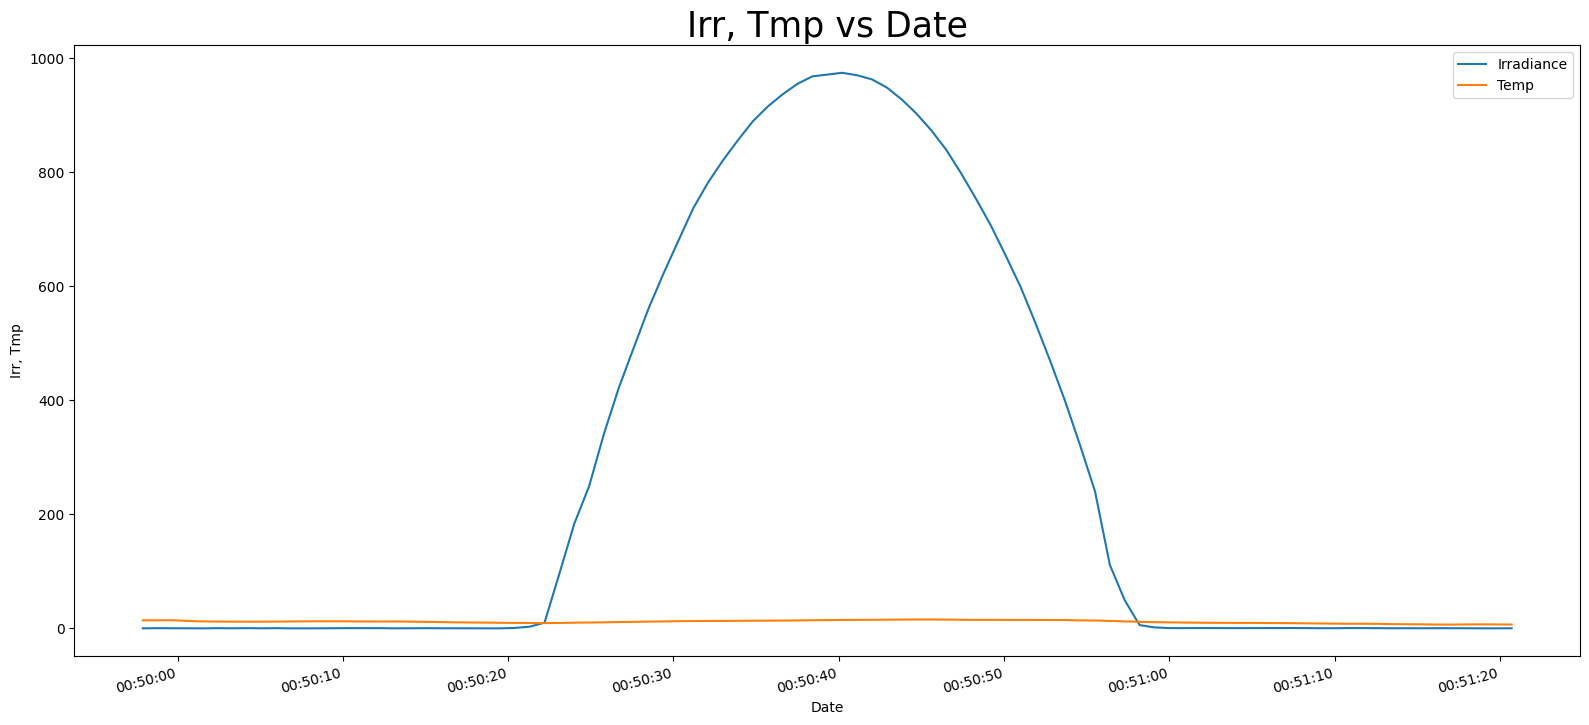

ylabel : Irr, Tmp


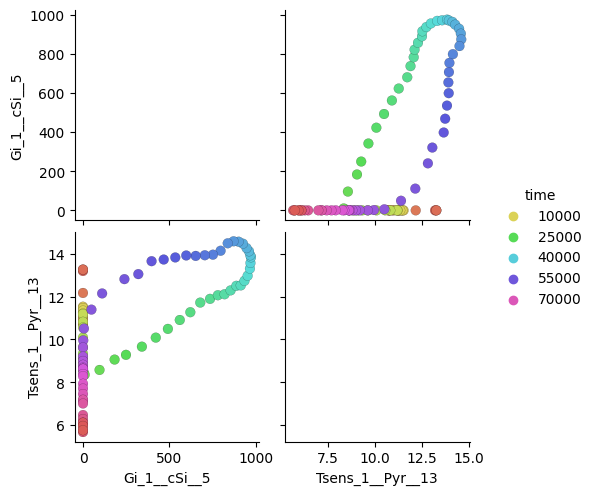

In [4]:
from gimodules.visualization import definedplots

xval = 'Gi_1__cSi__5'

definedplots.double_y_axis_plot(test_csv[3:], 'time', [xval, 'Tsens_1__Pyr__13'], yval_labels=['Irradiance', 'Temp'], ylabel='Irr, Tmp')

definedplots.pair_plot(test_csv[3:], [xval, 'Tsens_1__Pyr__13'], 'time', ylabel='Irr, Tmp')

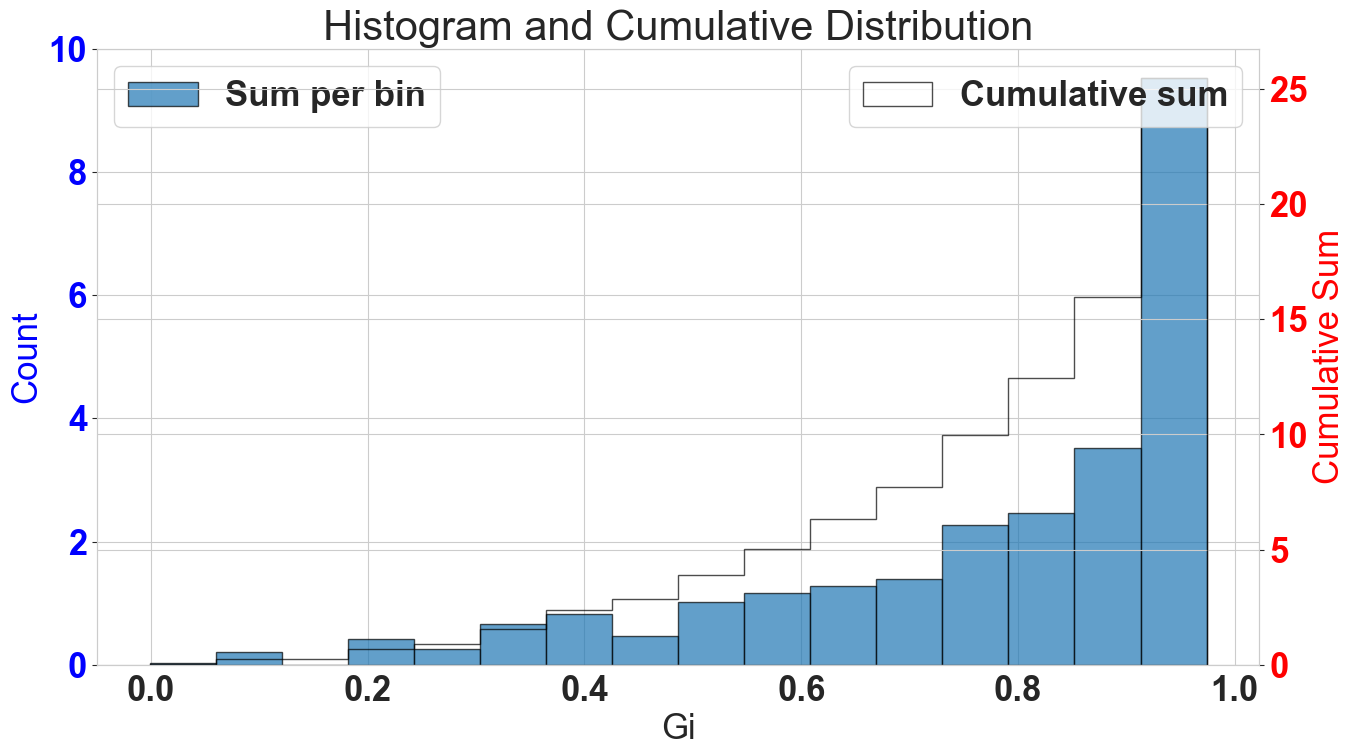

In [79]:
import pandas as pd

definedplots.hist_with_cumulative(test_csv[3:], xval, divider=1000, x_label='Gi')

/var/folders/ls/_2rnkbts7_9d833mngrvp1rh0000gn/T/ipykernel_96956/32073979.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ls/_2rnkbts7_9d833mngrvp1rh0000gn/T/ipykernel_96956/32073979.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ls/_2rnkbts7_9d833mngrvp1rh0000gn/T/ipykernel_96956/32073979.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

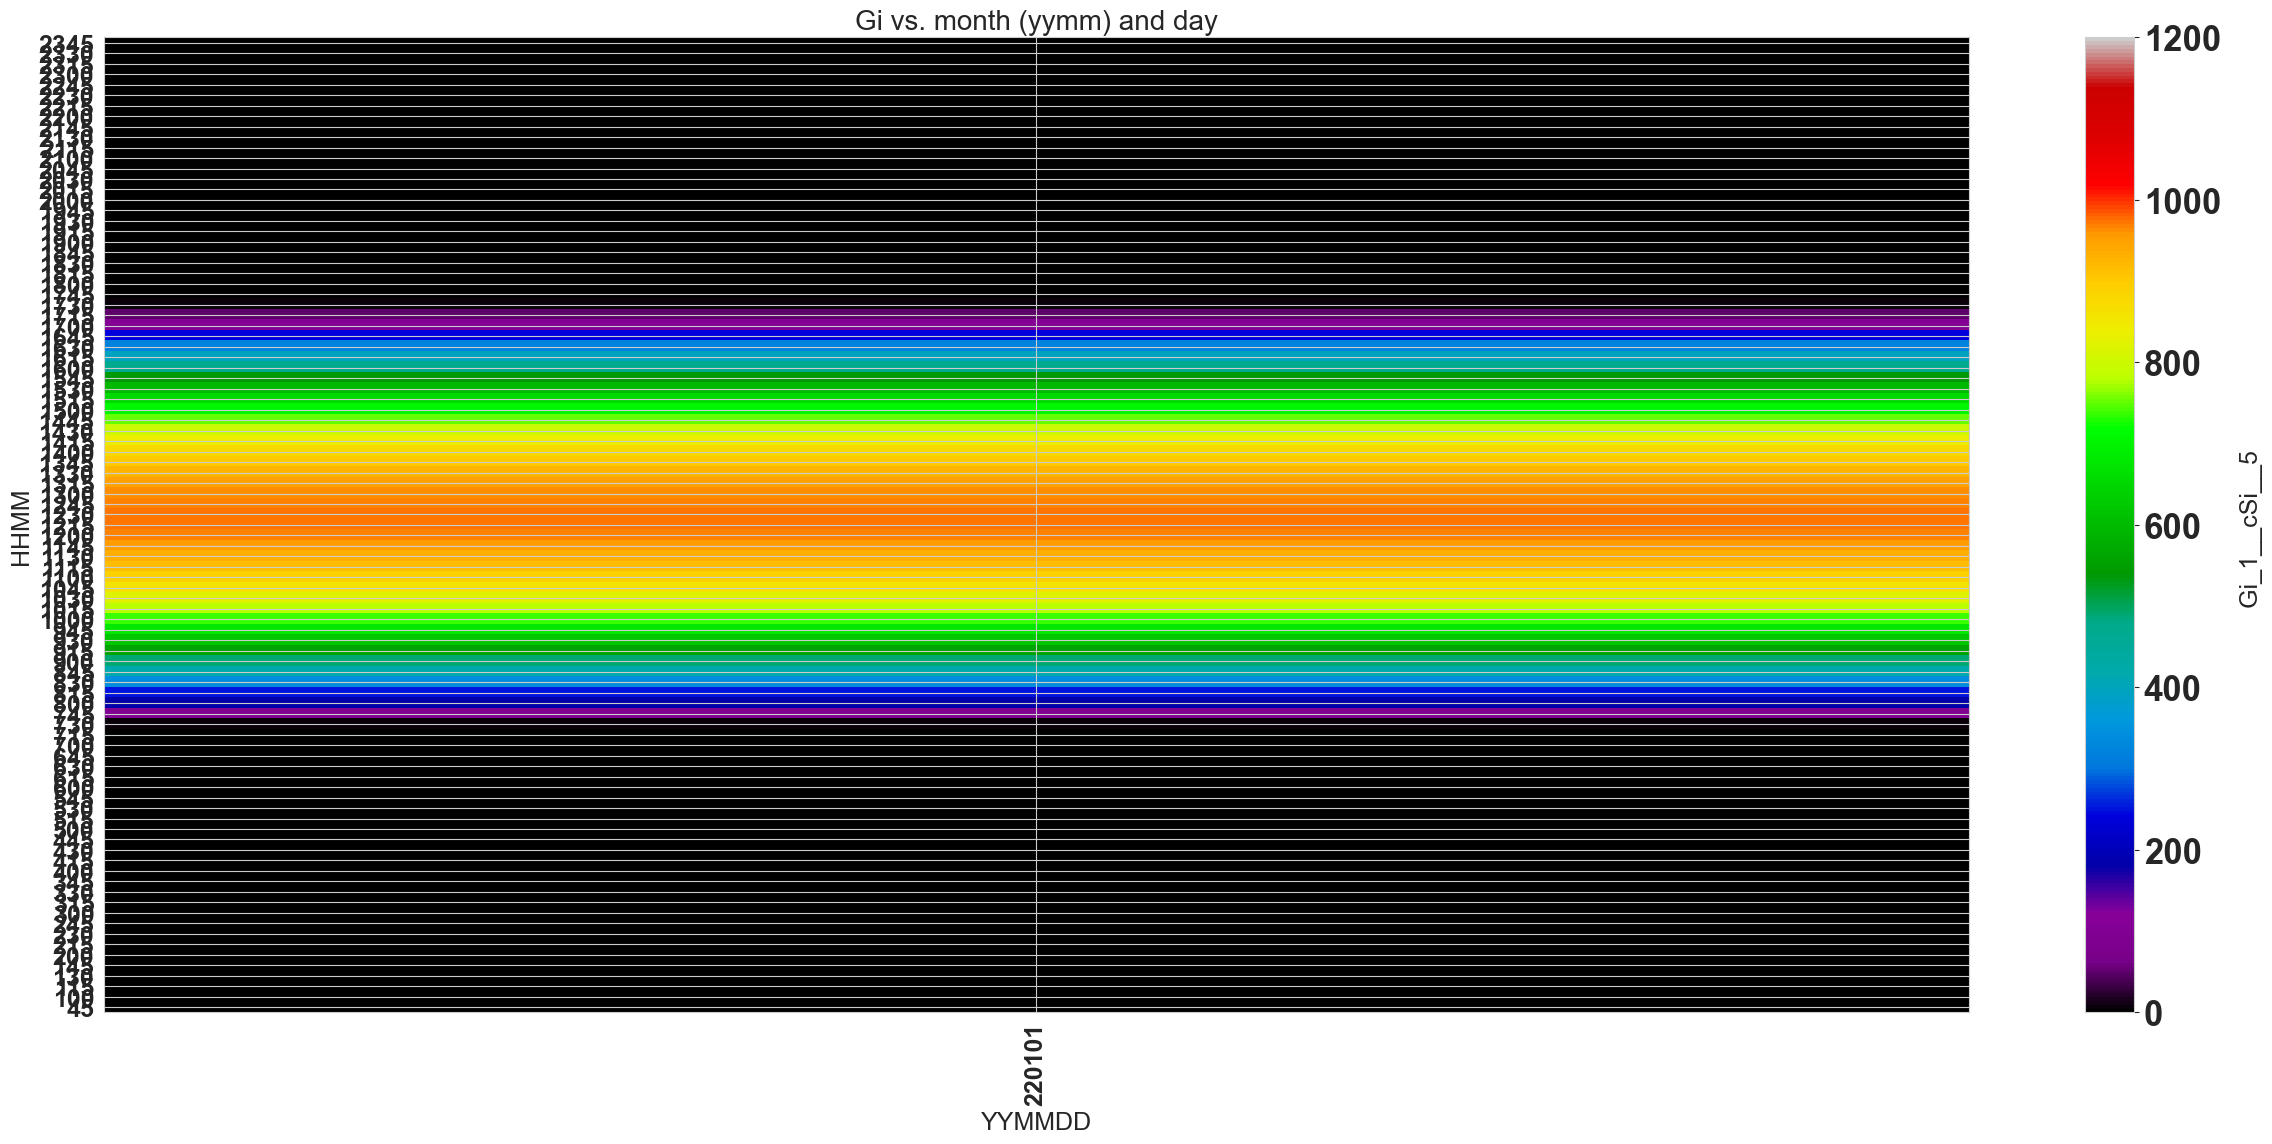

In [75]:
from datetime import timedelta

dd, hhmm = [], []

for indx, ts in enumerate(test_csv['time']):
    ts_adjusted = datetime.utcfromtimestamp(ts) - timedelta(hours=0)  # Apply timezone adjustment (UTC-7)
    dd.append(int(ts_adjusted.strftime('%Y%m%d')[2:]))
    hhmm.append(int(ts_adjusted.strftime('%H%M')))

# Add as new columns
test_csv['HHMM'] = hhmm
test_csv['YYMMDD'] = dd

# Change to numeric types
test_csv["YYMMDD"] = pd.to_numeric(test_csv["YYMMDD"], downcast="signed")


# Use Date columns in str format to create a heatmap
definedplots.define_heat_map(
    zval=xval,
    df=test_csv,
    start_yymmdd='220101',
    end_yymmdd='220102',
    yval='HHMM',
    xval='YYMMDD',
    vmin=0,
    vmax=1200,
    unit='',
    agg="max",
    colours='nipy_spectral',
    title=f'Gi vs. month (yymm) and day',
    save=False
)